### Optimization
Try to find the max value of the fucntions, optimised solution

1. f(x) = (x mod 6)^2 (x mod 7) - sin(x)
for x 0 to 100

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

In [3]:
sol = []
for x in range(0,101):
    y = (pow((x % 6), 2) % 7) - math.sin(x)
    sol.append(y)

In [4]:
np.amax(sol)

4.999990206550703

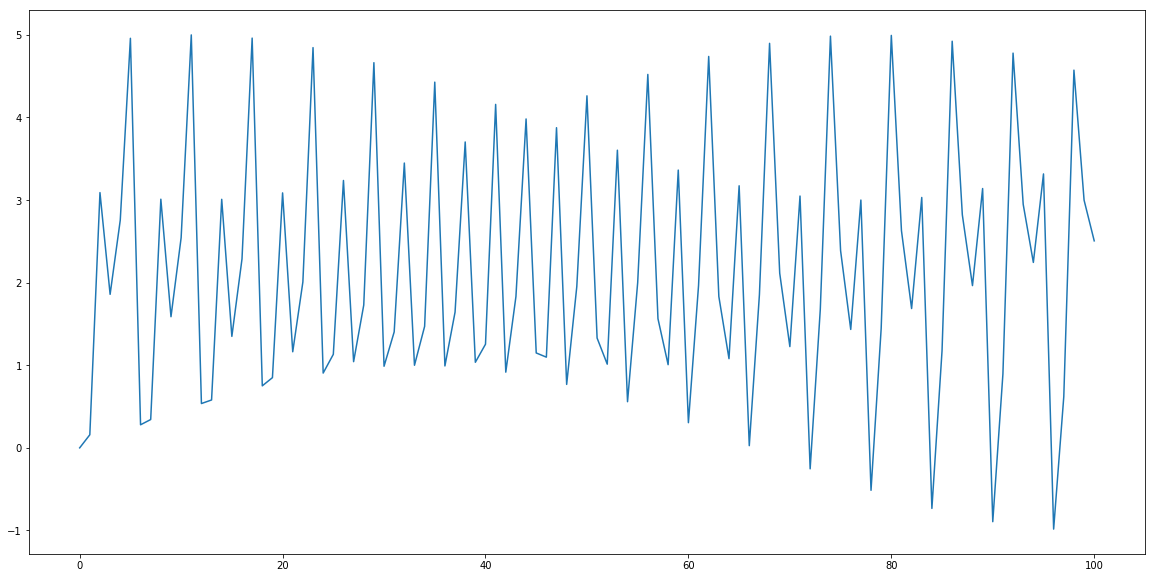

In [5]:
plt.figure(figsize=(20,10))
plt.plot(sol) # plotting by columns
plt.show()

### Final Project

 Pearson Correlation Similarity Measure.

In [6]:
mat = [['Ann',4.0,None,None,1.0,None, None],
       ['Bob',5.0,5.0,4.0,None,None, None],
       ['Carl', None,None, None, 4.0, 5.0 , None],
       ['Doug',None,3,None,None,None, 3.0]
      ]

In [7]:
print(mat)

[['Ann', 4.0, None, None, 1.0, None, None], ['Bob', 5.0, 5.0, 4.0, None, None, None], ['Carl', None, None, None, 4.0, 5.0, None], ['Doug', None, 3, None, None, None, 3.0]]


In [8]:
average_rating_by_persons = dict()
for data in mat:
    person = data[0]
    counter = 0
    sum_rat = 0
    for index in range (1, 7):
        if data[index] is not None:
            counter = counter + 1
            sum_rat = sum_rat + data[index]
    average_rating_by_persons[person] = sum_rat/counter    
            
print(average_rating_by_persons)    

{'Ann': 2.5, 'Bob': 4.666666666666667, 'Carl': 4.5, 'Doug': 3.0}


Calculate p(x,y) for each user
(Ann - Bob, Ann - Carl, Ann - Doug, Bob - Carl, Bob - Dough, Carl - Dough)

If there is not common item between any two user, p(x, y) will be zero

In [9]:
##Calculate The PCS
pca = dict()
for index_one in range(0, 4):
    for index_two in range (index_one+1,4):
        x_y = 0 # numerator
        x_d = 0
        y_d = 0
        for data_index in range(1, 7):
            if mat[index_one][data_index] is not None and mat[index_two][data_index] is not None:
                x = mat[index_one][data_index] - average_rating_by_persons[mat[index_one][0]]
                y = mat[index_two][data_index] - average_rating_by_persons[mat[index_two][0]]
                x_y = x_y + (x * y)
                x_d = x_d + (x * x)    
                y_d = y_d + (y * y)         
        if x_d == 0 or y_d == 0:
            pca_value = 0
        else:
            pca_value = x_y/(math.sqrt(x_d)* math.sqrt(y_d))                
        print(mat[index_one][0] , mat[index_two][0], pca_value)
        

Ann Bob 1.0
Ann Carl 1.0
Ann Doug 0
Bob Carl 0
Bob Doug 0
Carl Doug 0


In [10]:
copy_mat = np.copy(mat)

In [11]:
for row in range(0,4):
    for col in range(1, 7):
        if copy_mat[row][col]:
            copy_mat[row][col] = copy_mat[row][col] - average_rating_by_persons[copy_mat[row][0]] 

print(copy_mat)

[['Ann' 1.5 None None -1.5 None None]
 ['Bob' 0.33333333333333304 0.33333333333333304 -0.666666666666667 None
  None None]
 ['Carl' None None None -0.5 0.5 None]
 ['Doug' None 0.0 None None None 0.0]]


In [12]:
print(mat)

[['Ann', 4.0, None, None, 1.0, None, None], ['Bob', 5.0, 5.0, 4.0, None, None, None], ['Carl', None, None, None, 4.0, 5.0, None], ['Doug', None, 3, None, None, None, 3.0]]


In [14]:
for col in range(1,7):
    
    sum_val = 0
    counter = 0
    
    for row in range(0,4):

        if copy_mat[row][col] is not None:
            sum_val = sum_val + copy_mat[row][col]
            counter = counter +1    
    if counter is 0:
        avrg = 0
    else:    
        avrg = sum_val/counter
        
    for row in range(0,4):
        if copy_mat[row][col] is None:
            mat[row][col] = avrg + average_rating_by_persons[copy_mat[row][0]]

print(copy_mat)
print(mat)


[['Ann' 1.5 None None -1.5 None None]
 ['Bob' 0.33333333333333304 0.33333333333333304 -0.666666666666667 None
  None None]
 ['Carl' None None None -0.5 0.5 None]
 ['Doug' None 0.0 None None None 0.0]]
[['Ann', 4.0, 2.6666666666666665, 1.833333333333333, 1.0, 3.0, 2.5], ['Bob', 5.0, 5.0, 4.0, 3.666666666666667, 5.166666666666667, 4.666666666666667], ['Carl', 5.416666666666666, 4.666666666666666, 3.833333333333333, 4.0, 5.0, 4.5], ['Doug', 3.9166666666666665, 3, 2.333333333333333, 2.0, 3.5, 3.0]]


In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
print(mean_squared_error(np.array([3, 5.41, 4.66, 2.0, 3.5]),np.array([2, 2, 2, 4, 3])))

4.79074
